<a href="https://colab.research.google.com/github/MaddieMcGreevy/k_means_clustering/blob/main/k_means_clustering_with_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the packages. New packages today:


*   The Wine Dataset
*   K-means clustering algorithm.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans


from sklearn.datasets import load_diabetes
from sklearn.datasets import load_wine

In [2]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

### We are going to load the wine dataset. For more information on the Target and the features of this dataset, visit: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset

In [3]:
wine = load_wine(as_frame=True)
X, y = wine.data, wine.target

X = StandardScaler().fit_transform(X)

## How many clusters do we need? Let us use the elbow method to determine the optimal number of clusters.

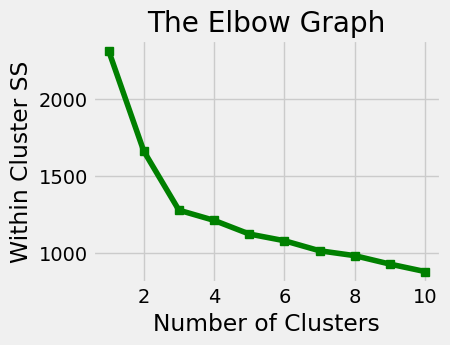

In [4]:
import matplotlib.style as style
style.available
style.use('fivethirtyeight')

wcss = {}
for i in range(1, 11):
	kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
	kmeans.fit(X)
	wcss[i] = kmeans.inertia_

plt.figure(figsize=(4,3))
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Number of Clusters")
plt.title('The Elbow Graph')
plt.ylabel('Within Cluster SS')
plt.show()

In [5]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [6]:
kmeans.cluster_centers_ # co-ordinates of the cluster centers.
kmeans.labels_ # final output

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [7]:
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 2 out of 178 samples were correctly labeled.
Accuracy score: 0.01


## To plot the clusters, we need 2-D. We currently have 17 variables. Hence, let us reduce the data to 2 dimensions using Principal Components Analysis (PCA).

In [8]:
pca=PCA(n_components=2)
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
reduced_X.head() #Reduced Features


,PCA1,PCA2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


In [9]:
centers=pca.transform(kmeans.cluster_centers_)
centers

array([[-2.72003575,  1.12565126],
       [ 2.29160133,  0.94318054],
       [-0.01614936, -1.74154889]])

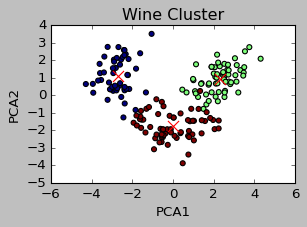

In [10]:
style.use('classic')
plt.figure(figsize=(4,3))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()


In [11]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Now, K-means clustering and PCA for the diabetes dataset

In [12]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target


In [17]:
kmeans.cluster_centers_ # co-ordinates of the cluster centers.
kmeans.labels_ # final output

array([1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 1,
       0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0,
       2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2,
       1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 2,
       1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0,
       2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1,
       2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 1, 0,
       2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 1,
       1, 1, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 2,
       0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2,

Text(0.5, 1.0, 'The Elbow Graph')

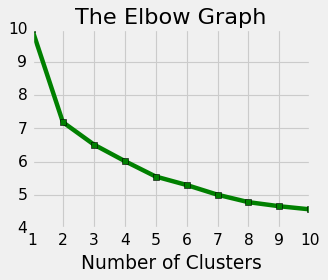

In [20]:
import matplotlib.style as style
style.available
style.use('fivethirtyeight')

wcss = {}
for i in range(1, 11):
	kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
	kmeans.fit(X)
	wcss[i] = kmeans.inertia_

plt.figure(figsize=(4,3))
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Number of Clusters")
plt.title('The Elbow Graph')

In [30]:
import numpy as np

new_y = np.where(y <= 152,0,1)
new_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
y.mean()

0.4411764705882353

In [31]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [32]:
import matplotlib.style as style
style.available
style.use('fivethirtyeight')

# Fit KMeans to the diabetes data
kmeans = KMeans(n_clusters=3) # You might need to adjust the number of clusters
kmeans.fit(X) # X is the diabetes data

# Get labels for the diabetes data
labels = kmeans.labels_

# Calculate accuracy for the diabetes data
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 160 out of 442 samples were correctly labeled.
